In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sara's Code:

In [ ]:
JB_tweets = pd.read_excel("/content/drive/MyDrive/STAT 3250: Sentiment Analysis of Politicians /JoeBiden.xlsx")


In [ ]:
DT_tweets = pd.read_excel("/content/drive/MyDrive/STAT 3250: Sentiment Analysis of Politicians /DonTrump.xlsx")

In [ ]:
Trump_AR = pd.read_excel("/content/drive/MyDrive/STAT 3250: Sentiment Analysis of Politicians /Trump_AR.xlsx")

In [ ]:
Biden_AR = pd.read_excel("/content/drive/MyDrive/STAT 3250: Sentiment Analysis of Politicians /Biden_AR.xlsx")

In [ ]:
pol_event = pd.read_csv("/content/drive/MyDrive/STAT 3250: Sentiment Analysis of Politicians /political_events.csv")

Rowan and Max's Code:

In [ ]:
JB_tweets = pd.read_excel("/content/drive/MyDrive/JoeBiden.xlsx")
DT_tweets = pd.read_excel("/content/drive/MyDrive/DonTrump.xlsx")
Trump_AR = pd.read_excel("/content/drive/MyDrive/Trump_AR.xlsx")
Biden_AR = pd.read_excel("/content/drive/MyDrive/Biden_AR.xlsx")

### Data Cleaning

Here, we're merging the columns in each csv and then combining the csv's. this allows us to preprocess the text data all at once


Modifying sara's cleaning code cause i dont understand :(
  

In [ ]:
import pandas as pd

# Subset Joe Biden tweets
subset_JB = JB_tweets[["created_at", "content"]]

# Convert 'created_at' to datetime format and extract year and month
subset_JB['created_at'] = pd.to_datetime(subset_JB['created_at'], errors='coerce')
subset_JB['Year'] = subset_JB['created_at'].dt.year
subset_JB['Month'] = subset_JB['created_at'].dt.month

# Format 'created_at' to "day month year" format
subset_JB['created_at'] = subset_JB['created_at'].dt.strftime('%d %b %Y')

# Add the 'ID' column with '@JoeBiden'
subset_JB['ID'] = '@JoeBiden'

# Reorder the columns
subset_JB = subset_JB[['ID', 'created_at', 'Year', 'Month', 'content']]

# Subset Donald Trump tweets
subset_DT = DT_tweets[["ID", "Time", "Tweet Text"]]

# Convert 'Time' to datetime format and extract year and month
subset_DT['Time'] = pd.to_datetime(subset_DT['Time'], errors='coerce')
subset_DT['Year'] = subset_DT['Time'].dt.year
subset_DT['Month'] = subset_DT['Time'].dt.month

# Format 'Time' to "day month year" format
subset_DT['Time'] = subset_DT['Time'].dt.strftime('%d %b %Y')

# Create an ID column in subset_DT for consistency
subset_DT['ID'] = "@DonaldTrump"

# Reorder the columns
subset_DT = subset_DT[['ID', 'Time', 'Year', 'Month', 'Tweet Text']]
print(subset_JB)
subset_DT

<ipython-input-8-c6e5768153c6>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  subset_JB['created_at'] = pd.to_datetime(subset_JB['created_at'], errors='coerce')
<ipython-input-8-c6e5768153c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_JB['created_at'] = pd.to_datetime(subset_JB['created_at'], errors='coerce')
<ipython-input-8-c6e5768153c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

             ID   created_at  Year  Month  \
0     @JoeBiden  17 Dec 2022  2022     12   
1     @JoeBiden  17 Dec 2022  2022     12   
2     @JoeBiden  17 Dec 2022  2022     12   
3     @JoeBiden  16 Dec 2022  2022     12   
4     @JoeBiden  16 Dec 2022  2022     12   
...         ...          ...   ...    ...   
7476  @JoeBiden  09 Apr 2012  2012      4   
7477  @JoeBiden  09 Apr 2012  2012      4   
7478  @JoeBiden  09 Apr 2012  2012      4   
7479  @JoeBiden  29 Dec 2007  2007     12   
7480  @JoeBiden  24 Oct 2007  2007     10   

                                                content  
0     Representatives of the people took a vote on t...  
1     Thanks to the Inflation Reduction Act, out-of-...  
2     When hospitals and community centers are threa...  
3     The American people won.\nBig Pharma lost.\n\n...  
4     We are making the largest investment ever in c...  
...                                                 ...  
7476  News for you this morning: VP Biden will speak.

,ID,Time,Year,Month,Tweet Text
0,@DonaldTrump,20 Jan 2017,2017,1,It all begins today! I will see you at 11:00 A...
1,@DonaldTrump,20 Jan 2017,2017,1,Today we are not merely transferring power fro...
2,@DonaldTrump,20 Jan 2017,2017,1,"power from Washington, D.C. and giving it back..."
3,@DonaldTrump,20 Jan 2017,2017,1,What truly matters is not which party controls...
4,@DonaldTrump,20 Jan 2017,2017,1,"January 20th 2017, will be remembered as the d..."
...,...,...,...,...,...
23070,@DonaldTrump,07 Jan 2021,2021,1,I am asking for everyone at the U.S. Capitol t...
23071,@DonaldTrump,07 Jan 2021,2021,1,https://t.co/Pm2PKV0Fp3
23072,@DonaldTrump,08 Jan 2021,2021,1,https://t.co/csX07ZVWGe
23073,@DonaldTrump,08 Jan 2021,2021,1,"The 75,000,000 great American Patriots who vot..."


In [ ]:

#Standardize the column names for both datasets so merging is easier
subset_JB = subset_JB.rename(columns={"created_at": "Time", "content": "Tweet Content"})
subset_DT = subset_DT.rename(columns={ "Tweet Text": "Tweet Content"})

#concatenate the two datasets
combined_data = pd.concat([subset_JB, subset_DT], ignore_index=True)

#this seems unnecessary but I'm including it just in case why not
#combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%m-%d-%Y')

#Sort by 'Date' in descending order - ideally, the dates should be from latest to earliest
sorted_data = combined_data.sort_values(by='Time', ascending=False)

#Reset the index for clean output - more of a personal preference thing, you can ignore this lololol
sorted_data = sorted_data.reset_index(drop=True)


df1 = sorted_data
df1 = df1[~df1['Tweet Content'].str.startswith(('RT', 'http'))]
df1

,ID,Time,Year,Month,Tweet Content
0,@JoeBiden,31 Oct 2022,2022,10,If we elect more Senate Democrats and keep con...
1,@JoeBiden,31 Oct 2022,2022,10,Make your plan to vote early or on Election Da...
2,@JoeBiden,31 Oct 2022,2022,10,"With Election Day right around the corner, I’m..."
3,@JoeBiden,31 Oct 2022,2022,10,I know which side I’m on.\nhttps://t.co/RBiVHJ...
4,@JoeBiden,31 Oct 2021,2021,10,"Virginia and New Jersey, there are only a few ..."
...,...,...,...,...,...
30550,@DonaldTrump,01 Apr 2017,2017,4,We are going to defend our industry &amp; crea...
30551,@DonaldTrump,01 Apr 2017,2017,4,Trump Celebrates American Manufacturing Survey...
30552,@DonaldTrump,01 Apr 2017,2017,4,It is an exciting time for our country! #Weekl...
30553,@DonaldTrump,01 Apr 2017,2017,4,#ConfirmGorsuch #SCOTUS https://t.co/WkqHYMcYa3


In [ ]:

# For Biden data
Biden_AR['User'] = '@JoeBiden'
Biden_AR['Year'] = Biden_AR['Date'].dt.year
Biden_AR['Month'] = Biden_AR['Date'].dt.month

# For Trump data
Trump_AR['User'] = '@DonaldTrump'
Trump_AR['Year'] = Trump_AR['Date'].dt.year
Trump_AR['Month'] = Trump_AR['Date'].dt.month

# merge the dataset

merged_AR = pd.concat([Biden_AR, Trump_AR], ignore_index=True)
merged_AR

,Date,Approval Rating,User,Year,Month
0,2021-01-26,51.7,@JoeBiden,2021,1
1,2021-02-22,50.9,@JoeBiden,2021,2
2,2021-03-16,54.8,@JoeBiden,2021,3
3,2021-04-20,50.9,@JoeBiden,2021,4
4,2021-05-18,52.1,@JoeBiden,2021,5
...,...,...,...,...,...
87,2020-09-28,46.0,@DonaldTrump,2020,9
88,2020-10-27,46.0,@DonaldTrump,2020,10
89,2020-11-19,43.0,@DonaldTrump,2020,11
90,2020-12-17,39.0,@DonaldTrump,2020,12


#### Text Preprocessing
Here, we use text mining tools/packages to process the tweet/text corpus and aggregate the tweets into a document term matrix

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
import re

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(df, text_column):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Preprocessing pipeline
    def clean_text(text):
        # Convert to string if not already
        text = str(text)
        # Convert to lowercase
        text = text.lower()
        # Remove links using regex
        text = re.sub(r'https?://\S+', '', text)
        # Remove punctuation
        text = ''.join(char for char in text if char.isalnum() or char.isspace())
        # Remove numbers
        text = ''.join(char for char in text if not char.isdigit())
        # Tokenize
        tokens = text.split()
        # Remove stopwords and stem
        tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
        # Remove links

        # If all tokens are removed, return the original text
        return ' '.join(tokens) if tokens else text

    # Apply preprocessing to the text column
    df['preprocessed_text'] = df[text_column].apply(clean_text)

    # Filter out completely empty preprocessed texts
    df = df[df['preprocessed_text'].str.strip() != '']

    # Create Document-Term Matrix
    vectorizer = CountVectorizer(min_df=1)  # Ensure at least one document uses each term
    dtm = vectorizer.fit_transform(df['preprocessed_text'])

    return df, dtm, vectorizer

def remove_sparse_terms(dtm, max_sparsity=0.90):
    # Convert sparse matrix to array for feature selection
    X = dtm.toarray()
    # Create a dummy y variable (required for chi2)
    y = np.ones(X.shape[0])

    # Calculate the percentile to keep based on sparsity
    percentile = (1 - max_sparsity) * 100

    # Use SelectPercentile to remove sparse terms
    selector = SelectPercentile(chi2, percentile=percentile)
    dtm_reduced = selector.fit_transform(X, y)

    return dtm_reduced, selector

# Application to the dataset
df, dtm, vectorizer = preprocess_text(df1, df1.columns[4])

# Remove sparse terms
dtm_candidates, selector = remove_sparse_terms(dtm, max_sparsity=0.90)

# Get feature names for the reduced matrix
terms_candidates = vectorizer.get_feature_names_out()[selector.get_support()]

# Convert reduced DTM to a DataFrame
candidate_tweets = pd.DataFrame(dtm_candidates, columns=terms_candidates)

print("Reduced Document-Term Matrix:")
print(candidate_tweets)
print("\nNumber of terms:", len(terms_candidates))

<ipython-input-12-decc8fb45539>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df[text_column].apply(clean_text)


Reduced Document-Term Matrix:
       aa  aaa  aand  aanhpi  aap  aapi  aaron  aarp  aarpiowaforum  ab  ...  \
0       0    0     0       0    0     0      0     0              0   0  ...   
1       0    0     0       0    0     0      0     0              0   0  ...   
2       0    0     0       0    0     0      0     0              0   0  ...   
3       0    0     0       0    0     0      0     0              0   0  ...   
4       0    0     0       0    0     0      0     0              0   0  ...   
...    ..  ...   ...     ...  ...   ...    ...   ...            ...  ..  ...   
21810   0    0     0       0    0     0      0     0              0   0  ...   
21811   0    0     0       0    0     0      0     0              0   0  ...   
21812   0    0     0       0    0     0      0     0              0   0  ...   
21813   0    0     0       0    0     0      0     0              0   0  ...   
21814   0    0     0       0    0     0      0     0              0   0  ...   

       br

#### Data Visualization
Here, we're visualizing the relationships between the words and seeing which words come up the most

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from scipy import stats
df1
df2=df1

Approval Ratings Over Time



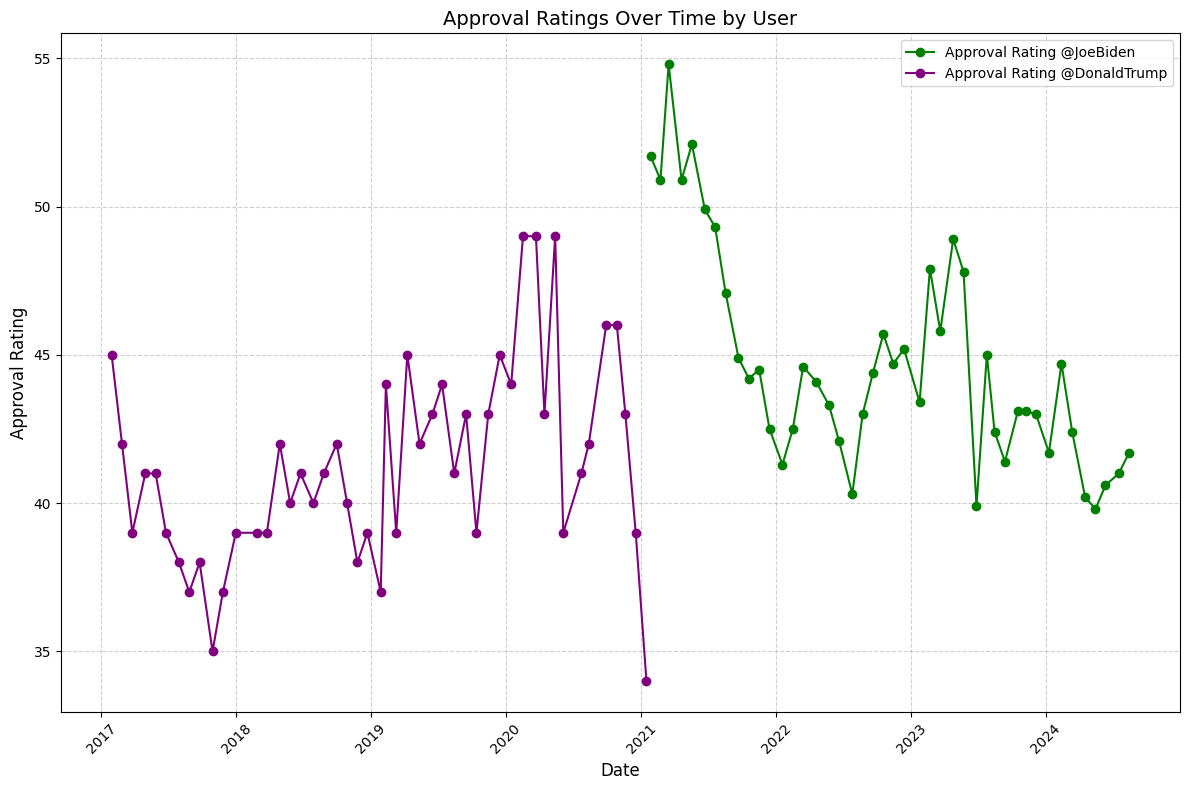

In [ ]:
# Group by User and Date to prepare for plotting
approval_grouped = merged_AR.groupby(['User', 'Date'])['Approval Rating'].mean().unstack(0)

# Plot approval ratings over time for each user
plt.figure(figsize=(12, 8))

# Plotting approval ratings for @JoeBiden and @DonaldTrump
if '@JoeBiden' in approval_grouped:
    plt.plot(
        approval_grouped.index,
        approval_grouped['@JoeBiden'],
        linestyle='-',
        marker='o',
        label='Approval Rating @JoeBiden',
        color='green'
    )
if '@DonaldTrump' in approval_grouped:
    plt.plot(
        approval_grouped.index,
        approval_grouped['@DonaldTrump'],
        linestyle='-',
        marker='o',
        label='Approval Rating @DonaldTrump',
        color='purple'
    )

# Aesthetic settings for the plot
plt.title('Approval Ratings Over Time by User', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Approval Rating', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

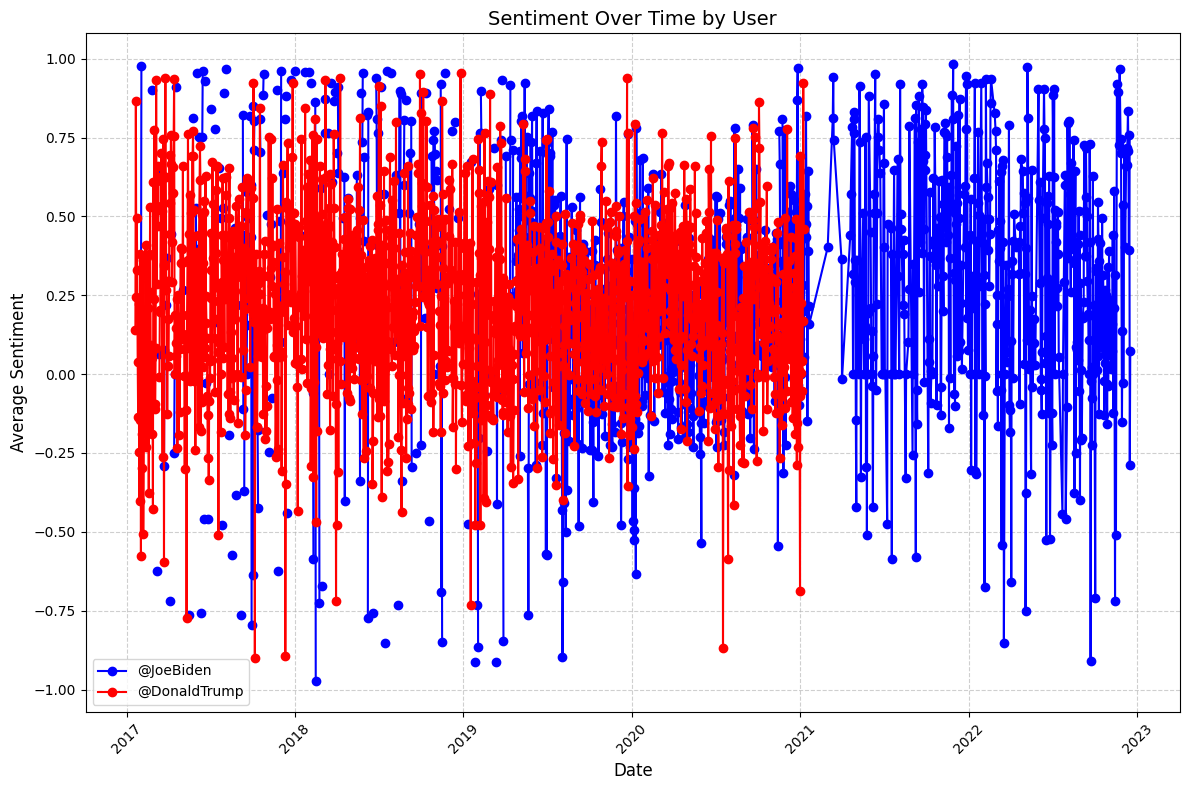

In [ ]:

# Filter data for year > 2016
df_filtered = df1[df1["Year"] > 2016]

# Group by 'ID' and 'Date', calculate mean sentiment for each group
sentiment_grouped = df_filtered.groupby(['ID', 'Date'])['sentiment'].mean().unstack(0)

# Plot sentiment over time for each ID
plt.figure(figsize=(12, 8))

# Plot lines for "@JoeBiden" and "@DonTrump" with specific colors
if "@JoeBiden" in sentiment_grouped:
    plt.plot(
        sentiment_grouped.index,
        sentiment_grouped["@JoeBiden"],
        marker='o',
        label='@JoeBiden',
        color='blue'
    )
if "@DonaldTrump" in sentiment_grouped:
    plt.plot(
        sentiment_grouped.index,
        sentiment_grouped["@DonaldTrump"],
        marker='o',
        label='@DonaldTrump',
        color='red'
    )

# Aesthetic settings for the plot
plt.title('Sentiment Over Time by User', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df3 = df1

# Convert Period to timestamp, then extract the month
df3['Month'] = df3['Month'].dt.to_timestamp().dt.month


<ipython-input-18-a8cef1fa8cb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['Month'].dt.to_timestamp().dt.month


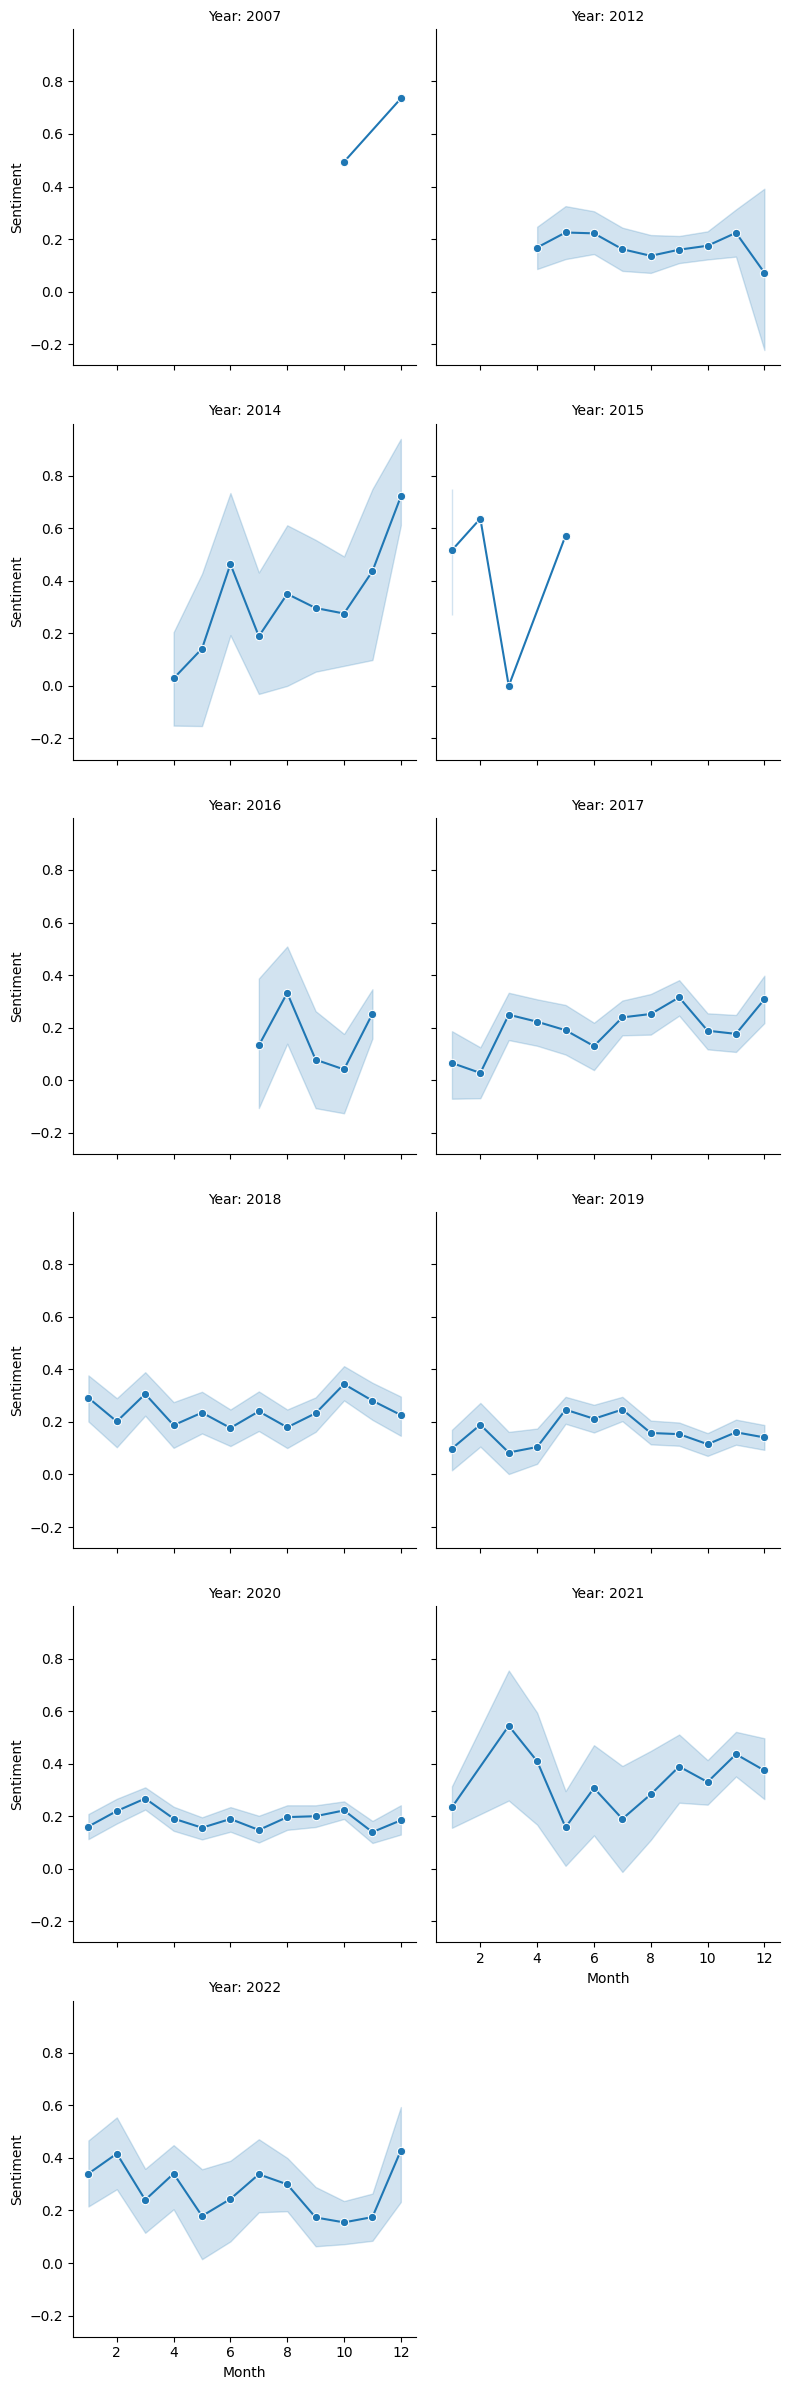

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a faceted graph
g = sns.FacetGrid(df3, col="Year", col_wrap=2, height=4, sharey=True)
g.map(sns.lineplot, "Month", "sentiment", marker="o")

# Add titles and labels
g.set_axis_labels("Month", "Sentiment")
g.set_titles("Year: {col_name}")
g.tight_layout()

# Show the plot
plt.show()


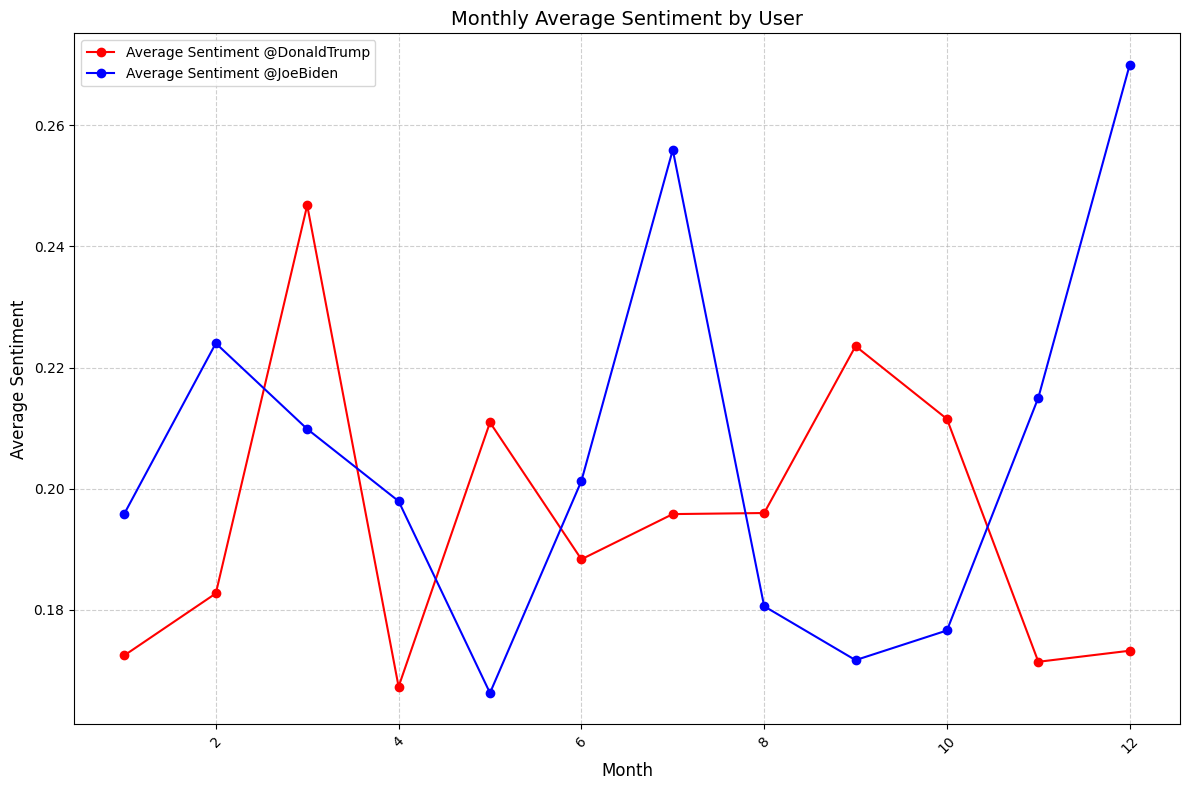

In [ ]:
# Calculating average sentiment grouped by month for Trump and Biden
trump_month = df1[df1["ID"] == "@DonaldTrump"]['sentiment'].groupby(df['Month']).mean()
biden_month = df1[df1["ID"] == "@JoeBiden"]['sentiment'].groupby(df['Month']).mean()

# Plotting the monthly sentiment averages
plt.figure(figsize=(12, 8))

# Trump monthly sentiment
plt.plot(
    trump_month.index,
    trump_month.values,
    marker='o',
    linestyle='-',
    label='Average Sentiment @DonaldTrump',
    color='red'
)

# Biden monthly sentiment
plt.plot(
    biden_month.index,
    biden_month.values,
    marker='o',
    linestyle='-',
    label='Average Sentiment @JoeBiden',
    color='blue'
)

# Aesthetic settings for the plot
plt.title('Monthly Average Sentiment by User', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-21-e4560082c8d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])  # Ensure Date column is datetime


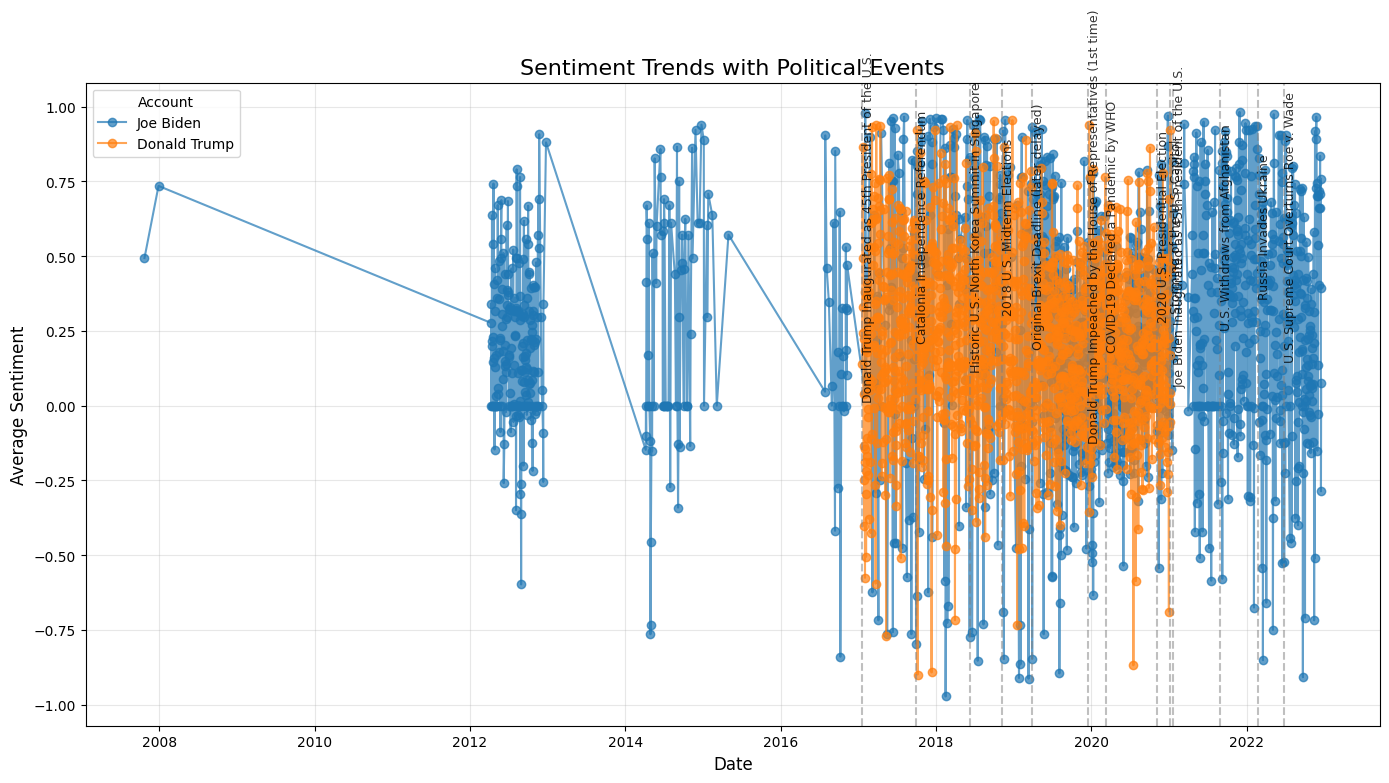

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df3` is already loaded
df3['Date'] = pd.to_datetime(df3['Date'])  # Ensure Date column is datetime

# Aggregate sentiment by Date and ID
average_sentiment = df3.groupby(['Date', 'ID'])['sentiment'].mean().reset_index()

# Split Biden and Trump data
biden_sentiment = average_sentiment[average_sentiment['ID'] == '@JoeBiden']
trump_sentiment = average_sentiment[average_sentiment['ID'] == '@DonaldTrump']

# Load `pol_event`
pol_event['Date'] = pd.to_datetime(pol_event['Date'])  # Convert event dates to datetime

# Plotting sentiment trends
plt.figure(figsize=(14, 8))
plt.plot(biden_sentiment['Date'], biden_sentiment['sentiment'], label='Joe Biden', marker='o', alpha=0.7)
plt.plot(trump_sentiment['Date'], trump_sentiment['sentiment'], label='Donald Trump', marker='o', alpha=0.7)

# Adding event markers
for i, row in pol_event.iterrows():
    plt.axvline(x=row['Date'], color='gray', linestyle='--', alpha=0.5)
    plt.text(row['Date'], 0.6, row['Event'], rotation=90, verticalalignment='center', fontsize=9, alpha=0.8)

# Customizing the plot
plt.title('Sentiment Trends with Political Events', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.legend(title='Account', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

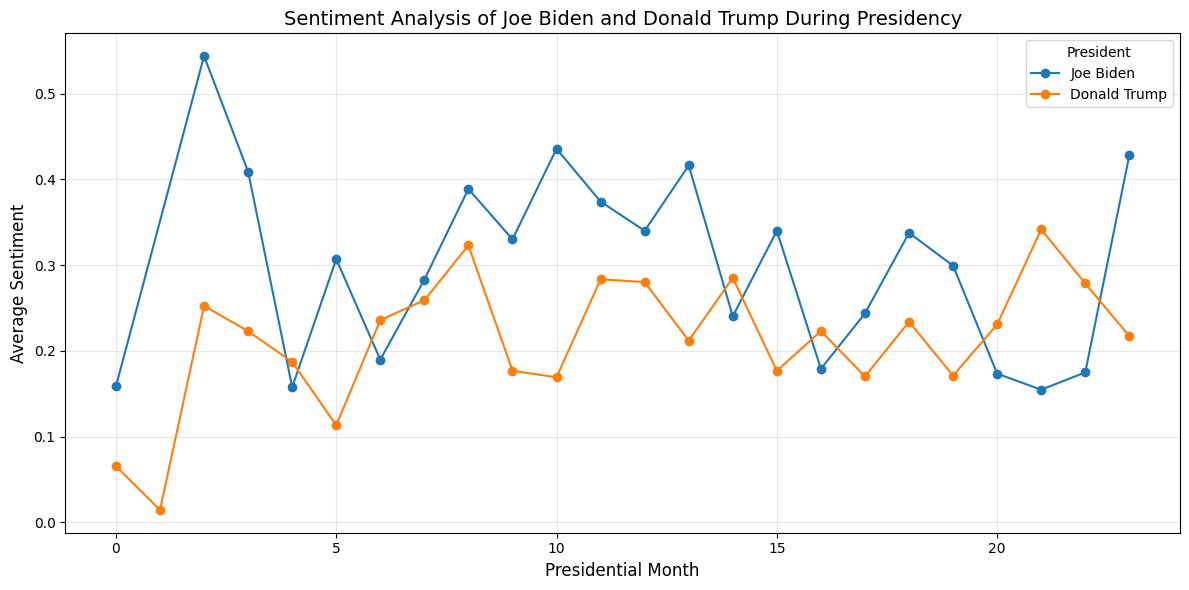

In [ ]:


# Filter for Joe Biden's tweets
biden_tweets = df3[df3['ID'] == '@JoeBiden'].copy()

# Define inauguration date for Joe Biden
inauguration_date = pd.Timestamp('2021-01-20')

# Calculate presidency month
biden_tweets['Presidency_Month'] = (
    (biden_tweets['Date'].dt.year - inauguration_date.year) * 12 +
    (biden_tweets['Date'].dt.month - inauguration_date.month)
)

# Adjust for months before presidency to be negative
biden_tweets.loc[biden_tweets['Date'] < inauguration_date, 'Presidency_Month'] -= 1

# Group by Presidency_Month to calculate average sentiment
monthly_sentiment_biden = biden_tweets.groupby('Presidency_Month')['sentiment'].mean().reset_index()

# Filter for Presidency_Month >= 0
biden_presidency_sentiment = monthly_sentiment_biden[monthly_sentiment_biden['Presidency_Month'] >= 0]

# Filter for Donald Trump's tweets
trump_tweets = df3[df3['ID'] == '@DonaldTrump'].copy()

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2017-01-20')

# Calculate presidency month for Donald Trump
trump_tweets['Presidency_Month'] = (
    (trump_tweets['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (trump_tweets['Date'].dt.month - inauguration_date_trump.month)
)

# Adjust for months before presidency to be negative
trump_tweets.loc[trump_tweets['Date'] < inauguration_date_trump, 'Presidency_Month'] -= 1

# Group by Presidency_Month to calculate average sentiment
monthly_sentiment_trump = trump_tweets.groupby('Presidency_Month')['sentiment'].mean().reset_index()
# Filter for Presidency_Month <= 23 for Donald Trump's tweets
trump_presidency_sentiment = monthly_sentiment_trump[monthly_sentiment_trump['Presidency_Month'] <= 23]


import matplotlib.pyplot as plt

# Plotting the sentiment trends for Joe Biden and Donald Trump
plt.figure(figsize=(12, 6))

# Plot Joe Biden's sentiment
plt.plot(
    biden_presidency_sentiment['Presidency_Month'],
    biden_presidency_sentiment['sentiment'],
    label="Joe Biden",
    marker='o',
    linestyle='-'
)

# Plot Donald Trump's sentiment
plt.plot(
    trump_presidency_sentiment['Presidency_Month'],
    trump_presidency_sentiment['sentiment'],
    label="Donald Trump",
    marker='o',
    linestyle='-'
)

# Add labels, legend, and title
plt.xlabel("Presidential Month", fontsize=12)
plt.ylabel("Average Sentiment", fontsize=12)
plt.title("Sentiment Analysis of Joe Biden and Donald Trump During Presidency", fontsize=14)
plt.legend(title="President", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


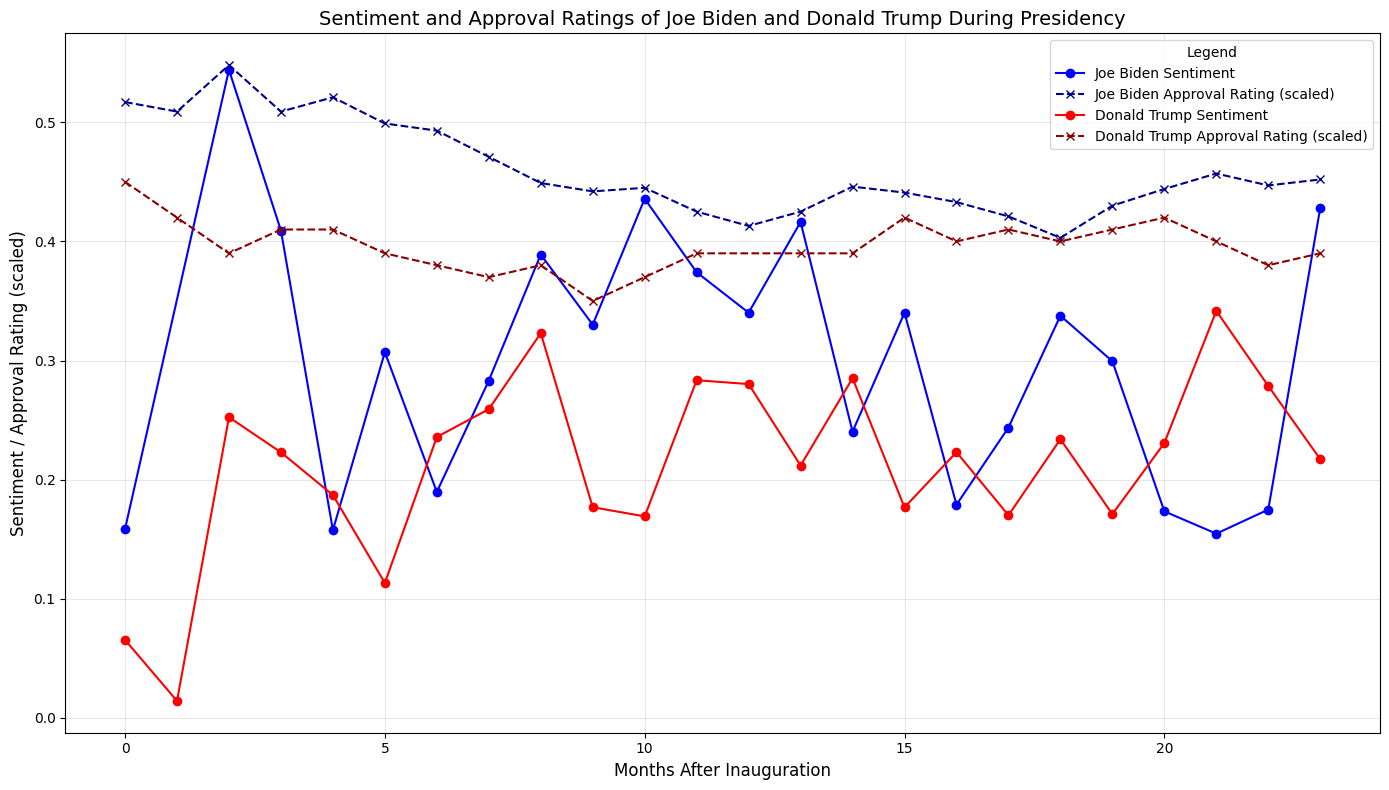

In [ ]:

# Ensure the 'Date' column is in datetime format
Trump_AR['Date'] = pd.to_datetime(Trump_AR['Date'])

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2017-01-20')

# Calculate months after inauguration
Trump_AR['Months_After_Inauguration'] = (
    (Trump_AR['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (Trump_AR['Date'].dt.month - inauguration_date_trump.month)
)

# Ensure the 'Date' column is in datetime format
Biden_AR['Date'] = pd.to_datetime(Biden_AR['Date'])

# Define inauguration date for Donald Trump
inauguration_date_trump = pd.Timestamp('2021-01-20')

# Calculate months after inauguration
Biden_AR['Months_After_Inauguration'] = (
    (Biden_AR['Date'].dt.year - inauguration_date_trump.year) * 12 +
    (Biden_AR['Date'].dt.month - inauguration_date_trump.month)
)
Trump_AR_23 = Trump_AR[Trump_AR['Months_After_Inauguration'] <= 23]
Biden_AR_23 = Biden_AR[Biden_AR['Months_After_Inauguration'] <= 23]


# Plotting the sentiment trends and approval ratings for Joe Biden and Donald Trump
plt.figure(figsize=(14, 8))

# Plot Joe Biden's sentiment
plt.plot(
    biden_presidency_sentiment['Presidency_Month'],
    biden_presidency_sentiment['sentiment'],
    label="Joe Biden Sentiment",
    color='blue',
    marker='o',
    linestyle='-'
)

# Plot Joe Biden's approval ratings
plt.plot(
    Biden_AR_23['Months_After_Inauguration'],
    Biden_AR_23['Approval Rating'] / 100,  # Scale approval ratings to match sentiment range
    label="Joe Biden Approval Rating (scaled)",
    color='darkblue',
    marker='x',
    linestyle='--'
)

# Plot Donald Trump's sentiment
plt.plot(
    trump_presidency_sentiment['Presidency_Month'],
    trump_presidency_sentiment['sentiment'],
    label="Donald Trump Sentiment",
    color='red',
    marker='o',
    linestyle='-'
)

# Plot Donald Trump's approval ratings
plt.plot(
    Trump_AR_23['Months_After_Inauguration'],
    Trump_AR_23['Approval Rating'] / 100,  # Scale approval ratings to match sentiment range
    label="Donald Trump Approval Rating (scaled)",
    color='darkred',
    marker='x',
    linestyle='--'
)

# Add labels, legend, and title
plt.xlabel("Months After Inauguration", fontsize=12)
plt.ylabel("Sentiment / Approval Rating (scaled)", fontsize=12)
plt.title("Sentiment and Approval Ratings of Joe Biden and Donald Trump During Presidency", fontsize=14)
plt.legend(title="Legend", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-30-10aea09756bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biden_presidency_sentiment['Sentiment_Change'] = biden_presidency_sentiment['sentiment'].diff()
<ipython-input-30-10aea09756bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Biden_AR_23['Approval_Rating_Change'] = Biden_AR_23['Approval Rating'].diff()
<ipython-input-30-10aea09756bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

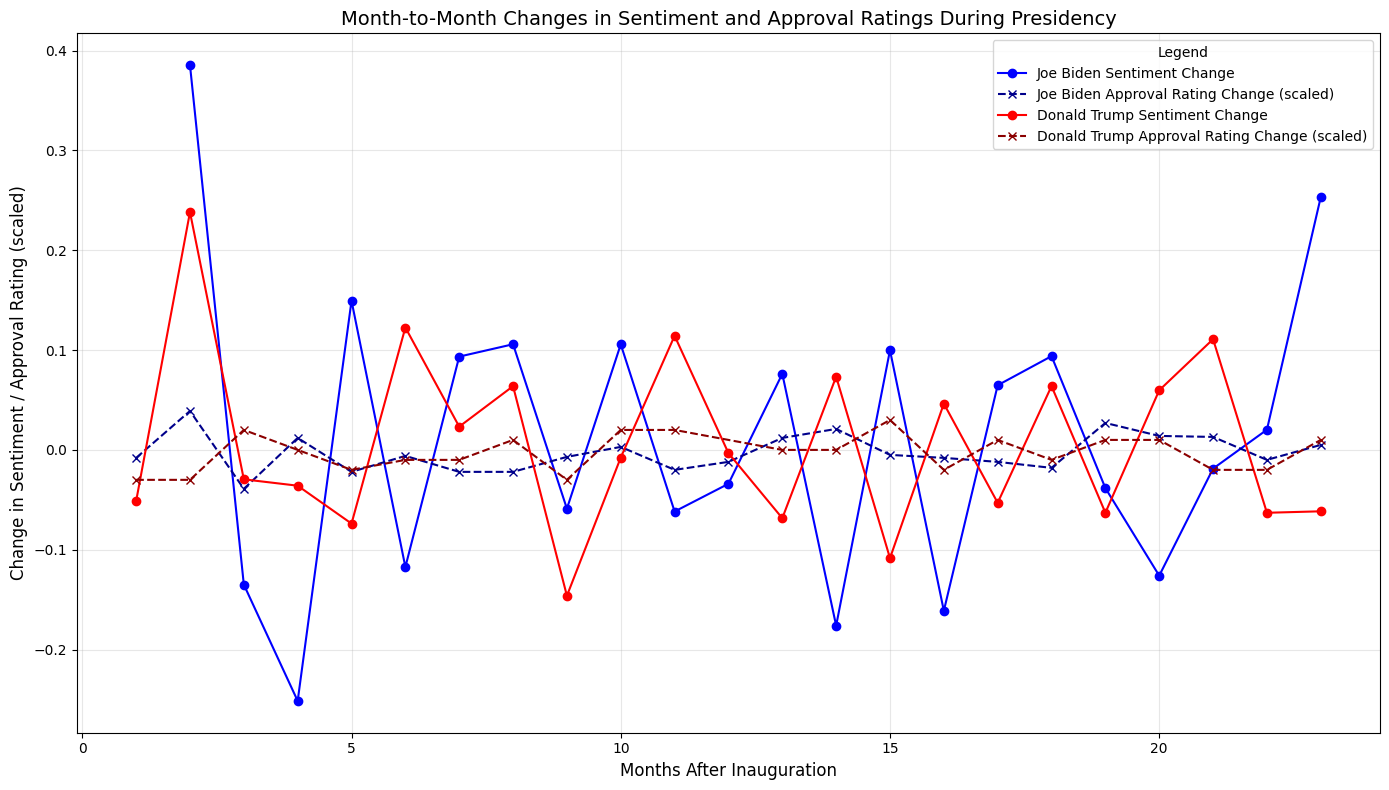

In [ ]:
# Calculate month-to-month changes in sentiment for Joe Biden
biden_presidency_sentiment['Sentiment_Change'] = biden_presidency_sentiment['sentiment'].diff()

# Calculate month-to-month changes in approval ratings for Joe Biden
Biden_AR_23['Approval_Rating_Change'] = Biden_AR_23['Approval Rating'].diff()

# Calculate month-to-month changes in sentiment for Donald Trump
trump_presidency_sentiment['Sentiment_Change'] = trump_presidency_sentiment['sentiment'].diff()

# Calculate month-to-month changes in approval ratings for Donald Trump
Trump_AR_23['Approval_Rating_Change'] = Trump_AR_23['Approval Rating'].diff()

# Plotting changes in sentiment and approval ratings
plt.figure(figsize=(14, 8))

# Plot changes in Joe Biden's sentiment
plt.plot(
    biden_presidency_sentiment['Presidency_Month'],
    biden_presidency_sentiment['Sentiment_Change'],
    label="Joe Biden Sentiment Change",
    color='blue',
    marker='o',
    linestyle='-'
)

# Plot changes in Joe Biden's approval ratings
plt.plot(
    Biden_AR_23['Months_After_Inauguration'],
    Biden_AR_23['Approval_Rating_Change'] / 100,  # Scale to match sentiment change range
    label="Joe Biden Approval Rating Change (scaled)",
    color='darkblue',
    marker='x',
    linestyle='--'
)

# Plot changes in Donald Trump's sentiment
plt.plot(
    trump_presidency_sentiment['Presidency_Month'],
    trump_presidency_sentiment['Sentiment_Change'],
    label="Donald Trump Sentiment Change",
    color='red',
    marker='o',
    linestyle='-'
)

# Plot changes in Donald Trump's approval ratings
plt.plot(
    Trump_AR_23['Months_After_Inauguration'],
    Trump_AR_23['Approval_Rating_Change'] / 100,  # Scale to match sentiment change range
    label="Donald Trump Approval Rating Change (scaled)",
    color='darkred',
    marker='x',
    linestyle='--'
)

# Add labels, legend, and title
plt.xlabel("Months After Inauguration", fontsize=12)
plt.ylabel("Change in Sentiment / Approval Rating (scaled)", fontsize=12)
plt.title("Month-to-Month Changes in Sentiment and Approval Ratings During Presidency", fontsize=14)
plt.legend(title="Legend", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Calculating summary statistics for Trump's presidency sentiment changes
summary_statistics_T = trump_presidency_sentiment["Sentiment_Change"].dropna().describe()

# Adding variance manually since it's not included in `describe`
summary_statistics_T['variance'] =trump_presidency_sentiment["Sentiment_Change"].dropna().var()

# Calculating summary statistics for Biden's presidency sentiment changes
summary_statistics_B = biden_presidency_sentiment["Sentiment_Change"].dropna().describe()

# Adding variance manually since it's not included in `describe`
summary_statistics_B['variance'] = biden_presidency_sentiment["Sentiment_Change"].dropna().var()

# Displaying the result
print(summary_statistics_T)
print(summary_statistics_B)
print(trump_presidency_sentiment)
print(biden_presidency_sentiment)

count       23.000000
mean         0.006595
std          0.090088
min         -0.146140
25%         -0.062226
50%         -0.007683
75%          0.063869
max          0.238197
variance     0.008116
Name: Sentiment_Change, dtype: float64
count       22.000000
mean         0.012252
std          0.149659
min         -0.251474
25%         -0.103427
50%          0.000741
75%          0.098352
max          0.385450
variance     0.022398
Name: Sentiment_Change, dtype: float64
    Presidency_Month  sentiment  Sentiment_Change
0                  0   0.065473               NaN
1                  1   0.014223         -0.051250
2                  2   0.252420          0.238197
3                  3   0.222932         -0.029488
4                  4   0.187070         -0.035863
5                  5   0.113240         -0.073830
6                  6   0.235838          0.122598
7                  7   0.259127          0.023289
8                  8   0.322979          0.063852
9                  9   0.1

In [ ]:
# Merging Trump and Biden sentiment with approval ratings based on provided DataFrames

# Assuming `trump_presidency_sentiment` and `Trump_AR_23` are already defined
# Merging Trump's sentiment and approval data
trump_combined = pd.merge(
    trump_presidency_sentiment[["Presidency_Month", "Sentiment_Change"]],
    Trump_AR_23[["Months_After_Inauguration", "Approval_Rating_Change"]],
    left_on="Presidency_Month",
    right_on="Months_After_Inauguration",
    how="inner"
).dropna()

# Assuming `biden_presidency_sentiment` and `Biden_AR_23` are already defined
# Merging Biden's sentiment and approval data
biden_combined = pd.merge(
    biden_presidency_sentiment[["Presidency_Month", "Sentiment_Change"]],
    Biden_AR_23[["Months_After_Inauguration", "Approval_Rating_Change"]],
    left_on="Presidency_Month",
    right_on="Months_After_Inauguration",
    how="inner"
).dropna()

# Calculate correlations
trump_correlation = trump_combined["Sentiment_Change"].corr(trump_combined["Approval_Rating_Change"])
biden_correlation = biden_combined["Sentiment_Change"].corr(biden_combined["Approval_Rating_Change"])

# Displaying the results
{
    "Trump Sentiment-Approval Correlation": trump_correlation,
    "Biden Sentiment-Approval Correlation": biden_correlation
}


# Calculating correlations and p-values
from scipy.stats import pearsonr

if not trump_combined.empty:
    trump_corr, trump_p_value = pearsonr(
        trump_combined["Sentiment_Change"],
        trump_combined["Approval_Rating_Change"]
    )
else:
    trump_corr, trump_p_value = None, None

if not biden_combined.empty:
    biden_corr, biden_p_value = pearsonr(
        biden_combined["Sentiment_Change"],
        biden_combined["Approval_Rating_Change"]
    )
else:
    biden_corr, biden_p_value = None, None

# Displaying the results
{
    "Trump Sentiment-Approval Correlation": trump_corr,
    "Trump p-value": trump_p_value,
    "Biden Sentiment-Approval Correlation": biden_corr,
    "Biden p-value": biden_p_value
}

{'Trump Sentiment-Approval Correlation': -0.15682734510161053,
 'Trump p-value': 0.4858156045427753,
 'Biden Sentiment-Approval Correlation': 0.11700805470028616,
 'Biden p-value': 0.6040620099261009}

###Trump Insights


### 1. Correlation Between Sentiment and Approval Ratings
**Correlation Value:** -0.157  
- A weak negative correlation suggests that sentiment changes have a small, inverse relationship with approval rating changes. Increases in sentiment are slightly associated with decreases in approval ratings and vice versa.

**Interpretation:**  
- This counterintuitive relationship reflects the unique dynamics of Trump’s presidency, where positive public sentiment might alienate moderates or independents, while controversies energize his core base.

---

### 2. Sentiment Trends
#### **Key Characteristics:**
- **Stability:**  
  - Trump’s sentiment changes exhibit low variance (**0.0081**), indicating steady public emotional reactions. Entrenched opinions among both supporters and critics likely dampen sharp swings.
- **Peaks and Dips:**  
  - Sentiment changes are smaller in magnitude compared to Biden, with fewer extreme swings. Positive and negative shifts tend to cluster around the mean, showing less variability.

---

#### **Sentiment Peaks:**
1. **Month 2 (+0.238):**  
   - This peak reflects the early optimism of the “honeymoon phase” following Trump’s inauguration.
   - Actions like withdrawing from the Trans-Pacific Partnership (TPP) and issuing executive orders likely resonated with his base.
   - His direct communication style and promises to "drain the swamp" energized supporters, leading to positive sentiment.

2. **Month 11 (+0.114):**  
   - This period aligns with the passage of the Tax Cuts and Jobs Act, a significant legislative victory.
   - Positive sentiment was bolstered by perceived economic benefits and holiday optimism.

3. **Month 18 (+0.063):**  
   - This modest increase might reflect continued economic success, including job creation and stock market gains, or diplomatic achievements like progress with North Korea.

---

#### **Sentiment Dips:**
1. **Month 9 (-0.146):**  
   - The sharpest decline corresponds to significant controversies:
     - The Charlottesville rally and Trump’s response drew widespread criticism.
     - The Senate’s failure to repeal the Affordable Care Act likely disillusioned some supporters.
     - Hurricane Harvey’s response, while impactful, may not have alleviated criticism.

2. **Month 15 (-0.108):**  
   - This dip aligns with midterm election pressures and dissatisfaction with immigration policies or the Russia investigation.
   - Public frustration with the pace of legislative progress may have also played a role.

3. **Month 21 (+0.111):**  
   - Following earlier dips, this recovery reflects sentiment gains tied to economic stability and foreign policy developments, possibly troop withdrawals or trade negotiations.

---

### 3. Approval Trends
#### **Key Characteristics:**
- **Moderate Fluctuations:**  
  - Approval rating changes are less volatile, reflecting the loyalty of Trump’s core base. This base insulates approval from sentiment swings, even during periods of controversy.
- **Weak Negative Correlation:**  
  - The slight inverse relationship between sentiment and approval highlights the polarization of Trump’s presidency.
  - Actions that improve sentiment for some groups may alienate others, resulting in a net drop in approval.

---

### 4. Public Perception Dynamics
#### **Core Support Base:**  
- Trump’s approval ratings are driven by a resilient core of supporters who view him as a champion against the establishment.
- This base is less influenced by negative sentiment changes and may even increase approval during controversies.

#### **Polarization Effects:**  
- Trump’s polarizing rhetoric and policies often generate strong reactions, both positive and negative.  
- These dynamics explain the weak correlation between sentiment and approval:
  - Positive sentiment may reflect actions that please his base but alienate moderates.
  - Negative sentiment often stems from controversial actions that simultaneously reinforce loyalty among supporters.

---

### 5. Communication Style
#### **Impact of Direct Messaging:**  
- Trump’s frequent use of Twitter allowed him to bypass traditional media, directly influencing public sentiment.  
- While this energized his base, it also amplified negative reactions among critics.
- The weak alignment between sentiment and approval suggests that his core supporters prioritize ideological alignment over emotional reactions captured by sentiment data.

---

### 6. Temporal Patterns
#### **Early Presidency:**  
- The largest sentiment spike (**+0.238 in Month 2**) reflects initial optimism.
- However, approval ratings show a slight decline, highlighting the disconnect between sentiment and broader approval.

#### **Mid-Presidency:**  
- Declines in sentiment during Months 9 and 15 coincide with political controversies and policy challenges.  
- These dips contrast with more stable approval trends, emphasizing the limited impact of sentiment shifts on Trump’s approval ratings.

#### **Later Presidency:**  
- Sentiment recovers modestly in later months, likely driven by economic successes or foreign policy developments.  
- Approval ratings remain steady, reflecting consistent support from his base.




###Biden Insights


### 1. Correlation Between Sentiment and Approval Ratings
**Correlation Value:** +0.117

- A weak positive correlation suggests that sentiment changes have a minor, direct relationship with approval rating changes. Increases in sentiment are slightly associated with increases in approval ratings, and vice versa.

**Interpretation:**
- The positive relationship reflects a more conventional dynamic, where improved public sentiment aligns with higher approval ratings. This might indicate that Biden’s messaging and actions resonate more directly with his broader coalition.

---

### 2. Sentiment Trends
#### **Key Characteristics:**
- **Higher Variability:**
  - Biden’s sentiment changes exhibit higher variance (**0.0224**) compared to Trump, indicating greater swings in public emotional reactions.
  - The broader coalition of support and the diverse expectations of Biden’s presidency may contribute to these fluctuations.
- **Peaks and Dips:**
  - Biden’s sentiment changes are more extreme, with larger spikes and deeper dips compared to Trump. This reflects a more dynamic presidency, with public sentiment reacting strongly to specific events or policies.

---

#### **Sentiment Peaks:**
1. **Month 2 (+0.385):**
   - The largest sentiment spike early in Biden’s presidency likely reflects the optimism of the “honeymoon phase.”
   - **Key drivers may include:**
     - Promises of decisive action on COVID-19, such as vaccine rollout plans.
     - Rejoining the Paris Climate Accord and signaling a return to international cooperation.
     - Executive orders reversing Trump-era policies, appealing to progressive and moderate voters.

2. **Month 8 (+0.106):**
   - This peak may reflect positive public reactions to stabilizing conditions:
     - Progress in vaccination campaigns and reopening efforts during the COVID-19 pandemic.
     - Economic recovery indicators, such as job growth.

3. **Month 23 (+0.253):**
   - A strong sentiment gain late in the observed period could align with legislative wins or improved economic indicators:
     - The passage of key bills like the Inflation Reduction Act.
     - Reduced gas prices or inflation-related improvements that resonate with voters.

---

#### **Sentiment Dips:**
1. **Month 4 (-0.251):**
   - The sharpest decline likely corresponds to early challenges in Biden’s presidency:
     - The withdrawal from Afghanistan and its chaotic execution drew widespread criticism.
     - Rising COVID-19 cases due to the Delta variant may have eroded public confidence.
     - Early struggles with passing key parts of Biden’s legislative agenda, such as Build Back Better.

2. **Month 14 (-0.176):**
   - This decline may be tied to economic and political challenges:
     - Inflation concerns likely dominated public discourse, particularly as consumer prices rose.
     - Legislative gridlock or opposition to voting rights reforms may have created public frustration.

3. **Month 20 (-0.126):**
   - Public sentiment may have declined due to continued inflation pressures and political divisions.
   - Events such as Roe v. Wade being overturned by the Supreme Court may have contributed to negative sentiment, especially if Biden’s response was perceived as insufficient by some voters.

---

### 3. Approval Trends
#### **Key Characteristics:**
- **Higher Volatility:**
  - Approval rating changes for Biden show greater variability compared to Trump, reflecting the diverse expectations of his support base.
- **Positive Correlation:**
  - The slight alignment between sentiment and approval ratings suggests that Biden’s approval is more sensitive to public emotional reactions, likely due to the broader coalition he governs.

---

### 4. Public Perception Dynamics
#### **Broad Coalition of Support:**
- Biden’s approval ratings depend on a mix of progressive, moderate, and independent voters, each with varying priorities. This makes his approval more reactive to sentiment shifts compared to Trump’s ideologically entrenched base.

#### **Policy Expectations and Public Reactions:**
- Peaks and dips in sentiment often reflect public responses to the success or failure of key policy initiatives. For example:
  - Positive sentiment spikes correspond to legislative wins or clear policy successes (e.g., vaccine rollouts).
  - Negative sentiment dips often align with crises or perceived shortcomings (e.g., Afghanistan withdrawal, inflation).

---

### 5. Communication Style
#### **Impact of Messaging:**
- Biden’s communication style is more traditional and less polarizing than Trump’s. This allows his messaging to resonate more consistently across his coalition.
- However, this traditional style may not energize his base as effectively, leading to sentiment declines during periods of inaction or crisis.

#### **Alignment with Public Sentiment:**
- Unlike Trump, Biden’s sentiment and approval ratings show a modest positive correlation, indicating that public sentiment better reflects approval for his leadership.

---

### 6. Temporal Patterns
#### **Early Presidency:**
- The largest sentiment spike (**+0.385 in Month 2**) reflects widespread optimism, driven by decisive early actions like the COVID-19 vaccine rollout and rejoining international agreements.

#### **Mid-Presidency:**
- Declines in sentiment during **Months 4 and 14** align with significant crises:
  - **Month 4:** The chaotic Afghanistan withdrawal and Delta variant resurgence.
  - **Month 14:** Rising inflation and legislative challenges.
- These dips coincide with declines in approval, highlighting a stronger alignment between sentiment and approval for Biden.

#### **Later Presidency:**
- Sentiment recovers in later months, likely driven by economic stabilization and legislative wins.
- The spike in **Month 23 (+0.253)** reflects a rebound in public confidence, possibly tied to economic recovery or key legislative achievements.


  

# Comparison Between Donald Trump and Joe Biden: Sentiment and Approval Dynamics

## **Key Differences**

| **Aspect**             | **Donald Trump**                                | **Joe Biden**                               |
|-------------------------|------------------------------------------------|--------------------------------------------|
| **Correlation**         | Weak negative (-0.157)                        | Weak positive (+0.117)                     |
| **Sentiment Variability** | Low variance (stable)                        | High variance (dynamic)                    |
| **Approval Trends**     | Moderate fluctuations, weak alignment with sentiment | Higher fluctuations, modest alignment with sentiment |
| **Public Perception**   | Polarized, stable core base                   | Diverse, reactive coalition                |
| **Communication Style** | Polarizing and direct, base-oriented          | Traditional and measured, coalition-oriented |
| **Response to Crises**  | Limited sentiment impact, resilient approval  | Sharp sentiment and approval declines      |
| **Early Presidency**    | Optimism from decisive actions (+0.238)       | Optimism from policy promises (+0.385)    |
| **Mid-Presidency**      | Stable despite controversies                  | Declines during crises                     |
| **Later Presidency**    | Stable sentiment and approval                 | Recovery in sentiment and approval         |

---

## **Detailed Observations**

### **1. Correlation Between Sentiment and Approval Ratings**
- **Trump**:
  - Correlation: Weak negative (-0.157).
  - Sentiment changes have a minor inverse relationship with approval ratings. Positive sentiment may alienate moderates, while controversies energize his core base.
- **Biden**:
  - Correlation: Weak positive (+0.117).
  - Sentiment changes have a minor direct relationship with approval ratings. Public approval aligns more closely with positive sentiment shifts.

---

### **2. Sentiment Trends**
#### **Variability**:
- **Trump**:
  - Sentiment changes are less volatile, with low variance (**0.0081**). Public emotions remain steady, reflecting entrenched opinions among supporters and critics.
- **Biden**:
  - Sentiment changes are more dynamic, with higher variance (**0.0224**). Larger spikes and dips reflect a broader, more reactive coalition.

#### **Peaks and Dips**:
- **Trump**:
  - Sentiment peaks and dips are smaller in magnitude, clustering around the mean.
  - **Largest Peak (Month 2)**: Optimism during the honeymoon phase (+0.238).
  - **Sharpest Dip (Month 9)**: Controversies like Charlottesville and healthcare reform failures (-0.146).
- **Biden**:
  - Sentiment peaks and dips are more extreme, reflecting stronger public reactions to events.
  - **Largest Peak (Month 2)**: Optimism driven by vaccine rollouts and rejoining international agreements (+0.385).
  - **Sharpest Dip (Month 4)**: Crises like the Afghanistan withdrawal and Delta variant resurgence (-0.251).

---

### **3. Approval Trends**
- **Trump**:
  - Moderate fluctuations in approval ratings, insulated by a loyal core base. Approval ratings are less influenced by sentiment shifts.
- **Biden**:
  - Higher fluctuations in approval ratings, reflecting a more diverse and reactive coalition. Approval ratings align more closely with sentiment changes.

---

### **4. Public Perception Dynamics**
- **Trump**:
  - Polarized public perception, with a stable core base less affected by sentiment changes. Controversies often strengthen approval among supporters.
- **Biden**:
  - Broad coalition of support makes approval ratings more sensitive to sentiment changes. Crises often lead to sharp declines in both sentiment and approval.

---

### **5. Communication Style**
- **Trump**:
  - Polarizing and direct messaging, often through Twitter, bypasses traditional media. Energizes his base but alienates critics, leading to weak alignment between sentiment and approval.
- **Biden**:
  - Traditional and less polarizing communication style resonates more broadly. Sentiment and approval are better aligned but may lack the energy to rally his base during crises.

---

### **6. Temporal Patterns**
#### **Early Presidency**:
- **Trump**:
  - Optimism during the honeymoon phase, with a sentiment peak in Month 2 (+0.238), driven by decisive early actions.
- **Biden**:
  - Stronger optimism during the honeymoon phase, with a sentiment peak in Month 2 (+0.385), driven by vaccine rollouts and policy reversals.

#### **Mid-Presidency**:
- **Trump**:
  - Stable sentiment and approval despite controversies like Charlottesville (Month 9) and healthcare reform challenges.
- **Biden**:
  - Sharp sentiment and approval declines during crises like the Afghanistan withdrawal (Month 4) and inflation concerns (Month 14).

#### **Later Presidency**:
- **Trump**:
  - Stable sentiment and approval ratings, reflecting entrenched public opinions.
- **Biden**:
  - Sentiment and approval recover, with a strong rebound in Month 23 (+0.253) tied to legislative wins and economic stabilization.

---

## **Conclusion**
- **Trump**:
  - Sentiment is less volatile and less aligned with approval ratings. His presidency is defined by polarization and a loyal core base that insulates approval from sentiment shifts.
- **Biden**:
  - Sentiment is more dynamic and aligns modestly with approval ratings. His presidency reflects a broader coalition where public perception is more reactive to successes and crises.


